In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import random
import torch

LABELS_PATH = "Dataset/Total GT"
IMAGES_PATH = "Dataset/Total Images"

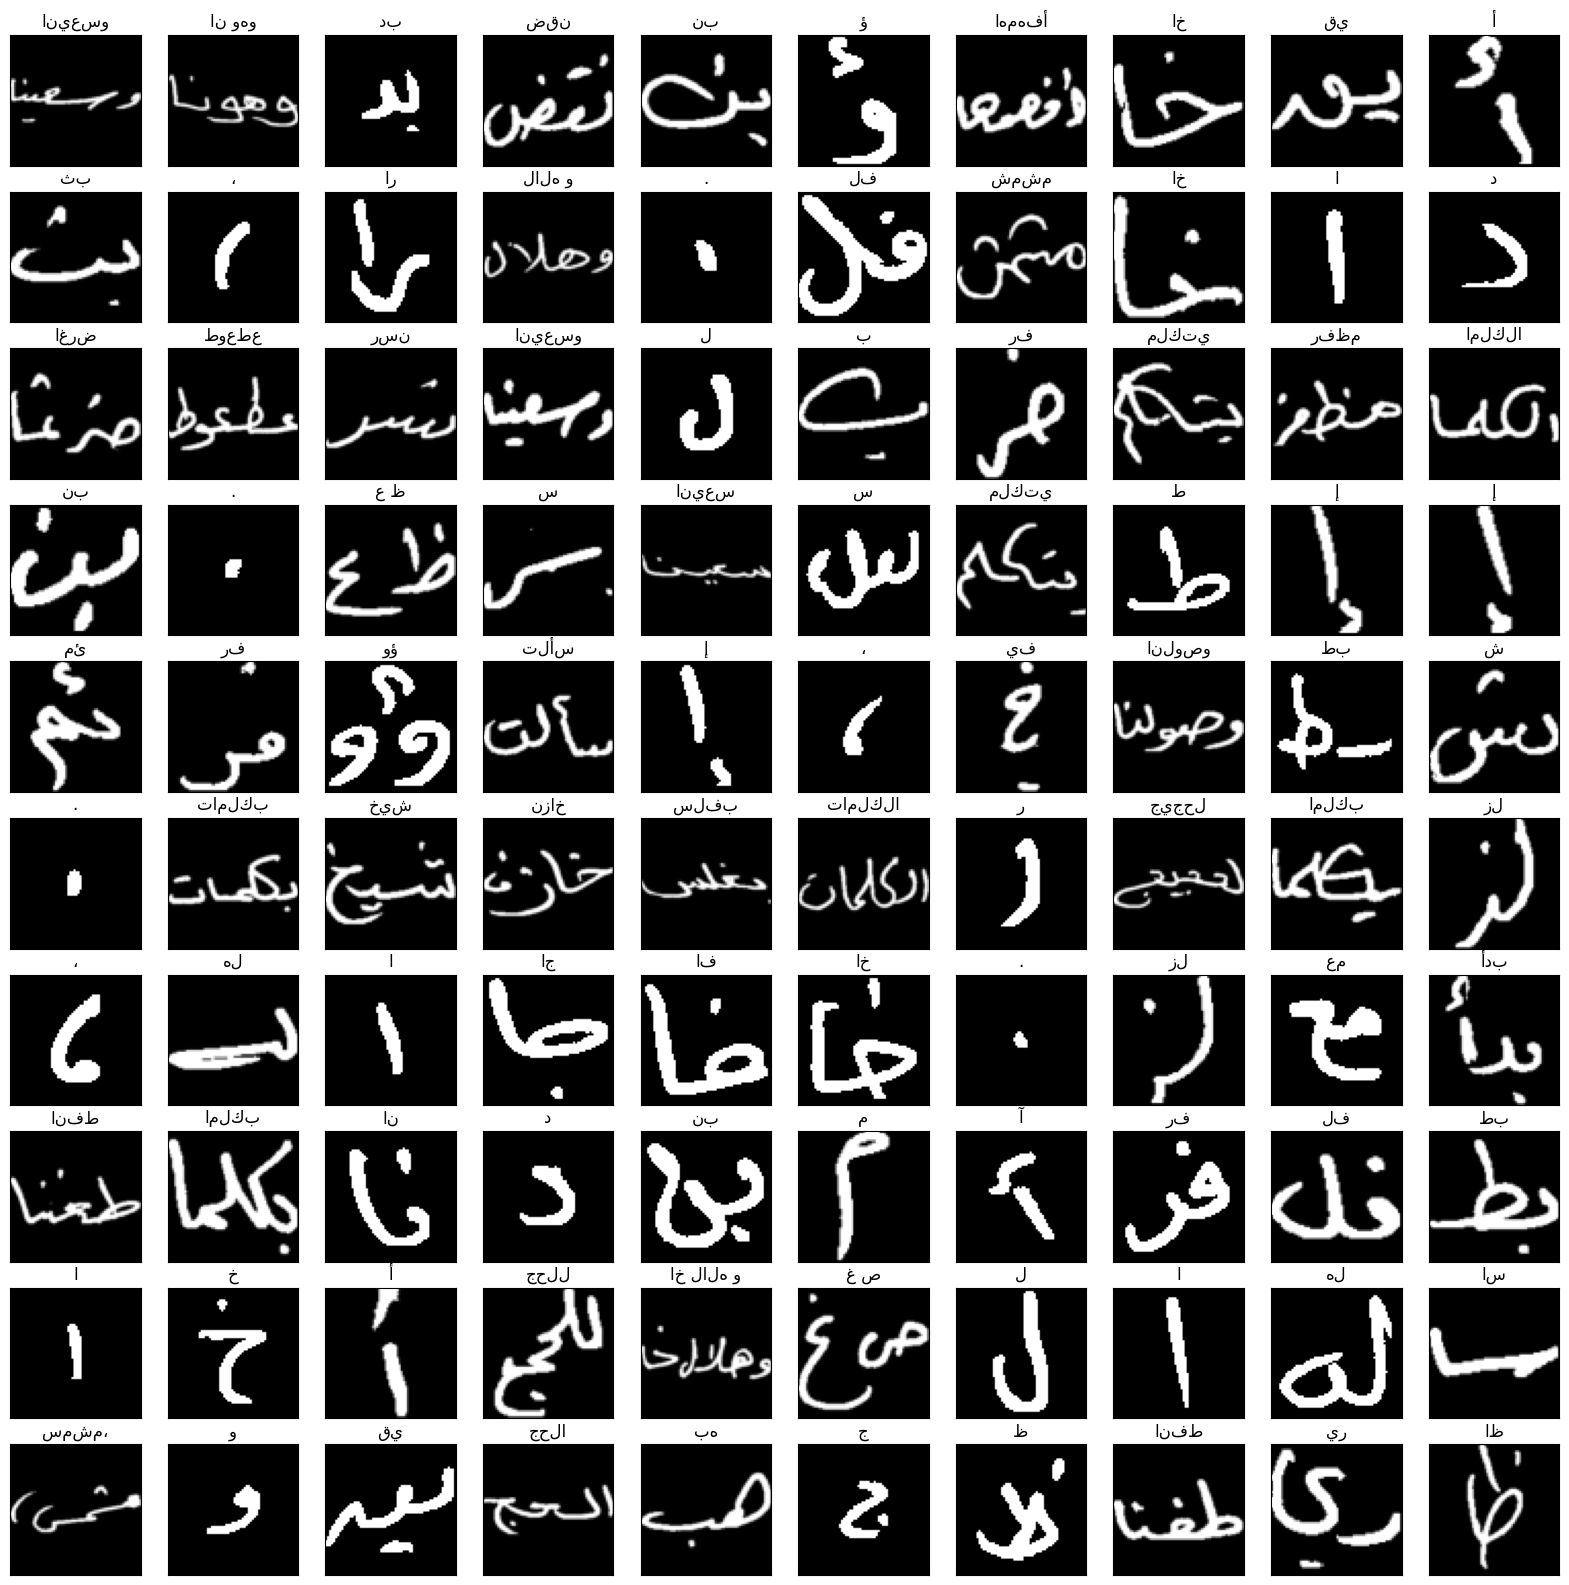

In [5]:
from source.utils import square_crop
import torchvision

resize = torchvision.transforms.Resize((64, 64))

fig, axs = plt.subplots(10,10, figsize=(20,20))

for i in range(10):
    for j in range(10):
        image_name = random.choice(os.listdir(IMAGES_PATH))
        with open(os.path.join(LABELS_PATH, image_name.split(".")[0]+".txt")) as f:
            image_label = f.read() 
        image = Image.open(os.path.join(IMAGES_PATH, image_name))
        axs[i,j].imshow(square_crop(np.array(image), resize), cmap="gray")
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        axs[i,j].set_title(image_label[::-1])

In [6]:
from source.model_scripts import BenchmarkCnn2
from source.custom_dataset import CustomDataset
from source.create_data_loader import create_data_loader

# Get train loaders
resize = torchvision.transforms.Resize((64, 64))
custom_dataset = CustomDataset(images_folder=DATASET_IMAGES_PATH,
                               labels_folder=DATASET_LETTERS_PATH,
                               transform=resize)
train_loader, val_loader, test_loader = create_data_loader(custom_dataset)

# Step 1: Define model

# Step 2: Set up your training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_classes = len(custom_dataset.unique_targets)

model = BenchmarkCnn2(64, num_classes)
model.load_state_dict(torch.load("saved_models/benchmark_cnn_2024-02-29_22-23-16.pth"))
model.eval()

ModuleNotFoundError: No module named 'utils'

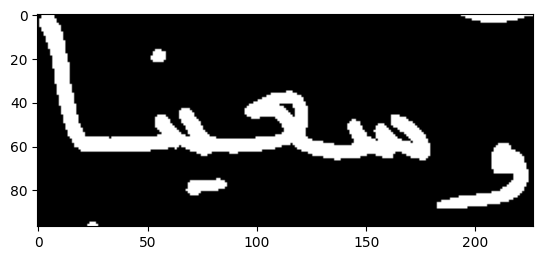

In [53]:
image_name = random.choice(os.listdir(IMAGES_PATH))
image = Image.open(os.path.join(IMAGES_PATH, image_name))

v_count = np.array(image).sum(axis=0)
v_count = v_count/v_count.max()

fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()

ax1.imshow(image,cmap="gray")
# ax2.plot(v_count)
plt.show()

`AHTD3A0211_Para1_4_word8.tif`

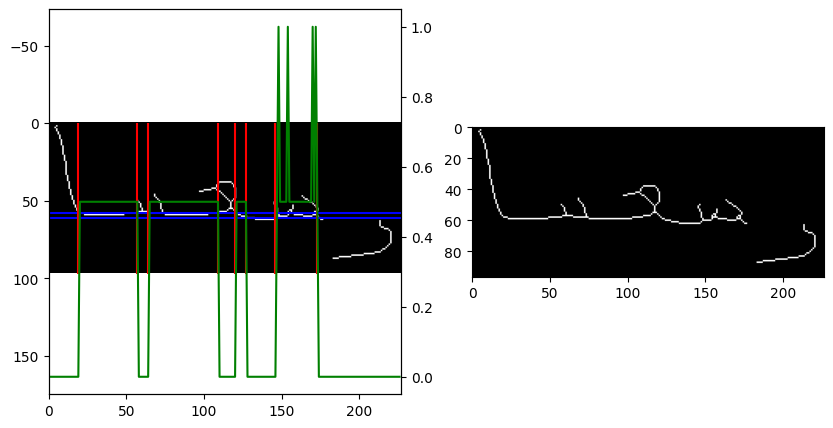

In [54]:
from skimage import io, morphology

def get_core_zone(image_array, threshold=0.3):
    row_sums = image_array.sum(axis=1)
    row_sums = row_sums/row_sums.max()

    upper = np.argmax(row_sums>0.3)
    lower = height-np.argmax(np.flip(row_sums)>threshold)+1

    return row_sums, (upper, lower)

def split_word(image_array, core_zone, threshold=0.4):
    col_sums = image_array[core_zone[0]:core_zone[1]].sum(axis=0)
    col_sums = col_sums/col_sums.max()

    segment_indices = np.where(
        np.abs(
            np.diff(
                    (col_sums>threshold)  # Above threshold
                )  # Derivative
            ) == 1  # Where it abs value equals one
        )[0]
    return col_sums, segment_indices

image_array = np.array(image)>=255
# Remove small objects
image_array = morphology.remove_small_objects(image_array, min_size=250)
image_array = morphology.skeletonize(image_array)

height, width = image_array.shape

row_sums, core_zone = get_core_zone(image_array, 0.5)
col_sums, segment_indices = split_word(image_array, core_zone, 0.2)

fig, (ax, ax2 )= plt.subplots(1,2, figsize=(10,5))

ax.imshow(image_array, cmap="gray")
ax.hlines(core_zone[0], 0 ,width, color="b")
ax.hlines(core_zone[1], 0 ,width, color="b")

ax.twinx().plot(col_sums, color='g')

ax.vlines(segment_indices, 0, height, color="r")

ax.set_xlim(0,width)

ax2.imshow(image_array, cmap="gray")

plt.show()

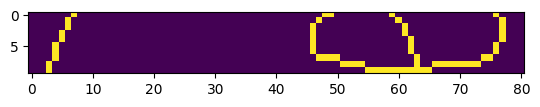

In [41]:
band_height = 10
band_sums = np.zeros(height-band_height)
for i in range(height-band_height):
    band_sums[i] = image_array[i:i+band_height,:].sum()

band_idx = np.argmax(band_sums)
plt.imshow(image_array[band_idx:band_idx+band_height])


In [21]:
labels = set()
for label_file in os.listdir(LABELS_PATH):
    file_path = os.path.join(LABELS_PATH, label_file)
    with open(file_path, "r") as f:
        label = f.read()
    labels.add(label)
labels = list(labels)

In [22]:
labels

['',
 'ث خ',
 'نسر\n',
 'جار',
 'نوح',
 'لكلما',
 'طا',
 '.',
 '.\n',
 'رؤوف',
 'أفهمها مثل',
 'الضا',
 '،ض',
 'ضرعا',
 'ت قو',
 'عفيف',
 'در',
 'بصحبة',
 'لخيمة',
 'فائدة',
 'لأ',
 'تحلم',
 'رايق',
 'يف',
 'خر',
 'لؤ',
 'ل',
 'بد',
 'ط',
 'فا',
 'غ ه',
 'من',
 'اصحابنا',
 'بغلس',
 'وصونا',
 'جع',
 ':مثل',
 'غا',
 'بصحة',
 'التالية لهذا',
 'ص',
 'بصح',
 'لوي',
 'فهمها',
 'صح',
 'سألت',
 'بصحبه',
 'لؤي',
 'نقض',
 'رؤو',
 'ؤ',
 'وف',
 'إثر آخر',
 'الخيمة',
 'في',
 'ثر',
 'فنا',
 'راق',
 'فر عطعوط',
 'ناء',
 '،راق',
 'حاج',
 'ؤو',
 'قو',
 'ؤوف',
 'ري',
 'روؤف',
 'ظافر',
 'ن',
 '.يلبي',
 'افل',
 'ئم',
 'حج',
 'بكلمات',
 'رؤ',
 'يق ظا',
 'بفلس',
 'فر',
 'الكلما',
 'كا.',
 'س',
 'ظ',
 'مظفر',
 'وهو نائم',
 '،مد',
 'كان',
 '،ق',
 'يق',
 'ر',
 'ند',
 'ئدة',
 'درا',
 'صحا',
 'خازا',
 'فائد',
 'أخر يلبي',
 'مشمس',
 'زن',
 'م بصحبة',
 'حا',
 'عف',
 'بة',
 'ثر آخر يلبي',
 'س ش ',
 'بن',
 'ذهب',
 'ت',
 'آخ',
 'هل تعلم',
 'النص',
 'و هلال',
 'ن عفيف',
 'م',
 'ا',
 'لية',
 'ج',
 'لحج',
 'صحابنا',
 'ئ